In [2]:

#import matplotlib;# matplotlib.use('agg')
import sys;
import os
import timeit
import numpy as np

sys.path.append("../../../../CPlantBox/");
sys.path.append("../../../../CPlantBox/src")
import numpy as np
import matplotlib.pyplot as plt

import functional.van_genuchten as vg

In [3]:
def getSat(cw,hm):
    Sat = (1/(1+(alpha*(-hm + omega0*(cw**beta)))**n))**(1-1/n)
    return Sat
    
alpha=0.0256
n =1.49
l=0.5
hm=-10000
omega0 = 10**10
beta = 4.1
cw=10e-3
print((1+(alpha*(-hm + omega0*(cw**beta)))**n))
getSat(cw,hm)

3912.5387661594873


0.06585479810173052

In [23]:
def effective_saturation(h, sp):
    """ returns the effective saturation [1] at a given matric potential [cm] according to the VanGenuchten model (dimensionless water content, Eqn 2) """
    # h = min(h, 0)  # pressure head is negative, zero the maximum
    theta = vg.water_content(h, sp)
    #print('theta',theta)
    se = (theta - sp.theta_R) / (sp.theta_S - sp.theta_R)
    return se
def hydraulic_conductivity(sp,h):
    """ returns the hydraulic conductivity [cm/day] at a given matric potential [cm] according to the van genuchten model (Eqn 8) """
    se = effective_saturation(h, sp)
    #print(se)
    K = sp.Ksat * (se ** 0.5) * ((1. - pow(1. - pow(se, 1. / sp.m), sp.m)) ** 2)
    return K
def getKm(cw,hm,sp):
    omega0 = 10**10
    beta = 4.1
    h = np.minimum(0.,hm + omega0*(cw**beta))
    #print(h)
    k = hydraulic_conductivity(sp,h) #[cm/day] 
    muwat = 1
    nu = 566
    d = 1.4
    musol = muwat * (1+nu*(cw**d))
    return k*muwat/musol 

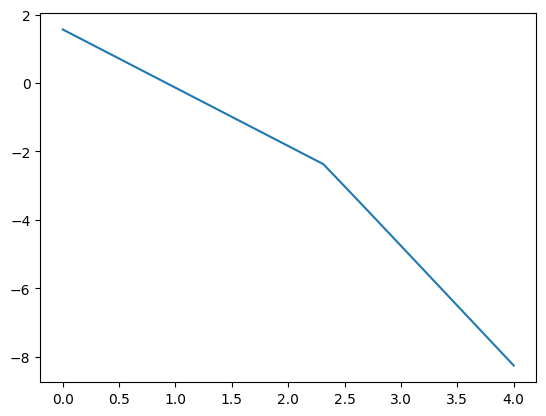

In [34]:
soilVG = vg.Parameters( [0.08, 0.43, 0.04, 1.6, 50]) 
h = np.linspace(-1,-10000)
cw1= 0.05*1e-3

kk=getKm(cw1,h,soilVG)
plt.plot(np.log10(-h),np.log10( kk))

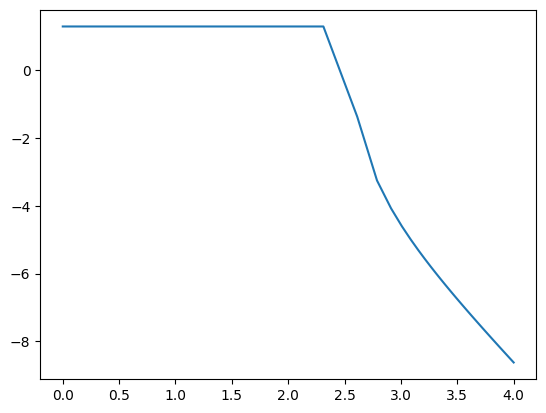

In [33]:
soilVG = vg.Parameters( [0.08, 0.43, 0.04, 1.6, 50]) 
h = np.linspace(-1,-10000)
cw1= 15*1e-3

kk=getKm(cw1,h,soilVG)
plt.plot(np.log10(-h),np.log10( kk))

In [32]:
print(np.log10(-h),h)

[0.         2.31188355 2.61185331 2.78759058 2.91235222 3.00915594
 3.0882663  3.15516246 3.21311643 3.26423941 3.30997326 3.35134661
 3.38911905 3.42386752 3.45604052 3.48599361 3.51401347 3.54033458
 3.56515121 3.58862609 3.61089688 3.63208112 3.6522799  3.67158085
 3.6900604  3.70778562 3.72481568 3.74120307 3.75699452 3.77223187
 3.78695268 3.80119083 3.81497697 3.82833892 3.841302   3.85388934
 3.8661221  3.87801973 3.88960009 3.90087966 3.91187368 3.92259625
 3.93306045 3.94327844 3.95326153 3.96302029 3.97256458 3.98190363
 3.99104606 4.        ] [-1.00000000e+00 -2.05061224e+02 -4.09122449e+02 -6.13183673e+02
 -8.17244898e+02 -1.02130612e+03 -1.22536735e+03 -1.42942857e+03
 -1.63348980e+03 -1.83755102e+03 -2.04161224e+03 -2.24567347e+03
 -2.44973469e+03 -2.65379592e+03 -2.85785714e+03 -3.06191837e+03
 -3.26597959e+03 -3.47004082e+03 -3.67410204e+03 -3.87816327e+03
 -4.08222449e+03 -4.28628571e+03 -4.49034694e+03 -4.69440816e+03
 -4.89846939e+03 -5.10253061e+03 -5.30659184e+03 -

In [4]:

#print(vg.water_content(-80.5, soilVG),
#vg.water_content(-1500, soilVG))

0.2444492330193831 0.10998781151043954


In [26]:
1/(1.87-1)

1.1494252873563218

In [29]:
# water-limited
P = 870
PET = 1112
print('AI',PET/P)
ET_P = (1-(1-0.623)*(P/PET))
print('ET/P',ET_P,'P', ET_P*P)

AI 1.27816091954023
ET/P 0.705044964028777 P 613.389118705036


In [ ]:
ET_P = 0.623*(PET/P)